In [12]:
from datetime import datetime
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
import scraping as sp
import pandas as pd
import pickle as pkl

In [2]:
usrs = sp.test_find_reviewers('shes-funny-that-way', 10)

In [3]:
g = nx.Graph()
g.add_nodes_from(usr[:,0])

for usr in tqdm(usrs[:,0]):
    friends = sp.find_friends(usr)
    mask = np.in1d(usrs[:,0], friends)
    for friend in usrs[mask == True, 0]:
        g.add_edge(usr, friend)
    

100%|██████████| 110/110 [39:57<00:00, 21.79s/it] 


100%|██████████| 110/110 [00:00<00:00, 27569.37it/s]


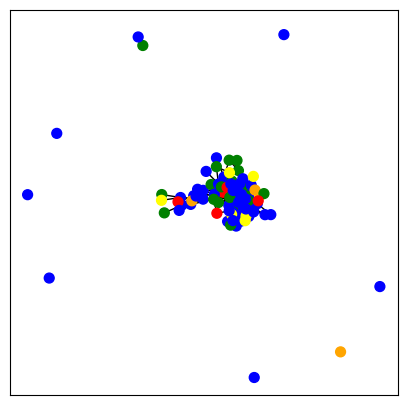

In [68]:
for i in tqdm(range(len(usrs[:,0]))):
    g.nodes[usrs[i,0]]['type'] = usrs[i,1].astype(int) 

color_state_map = {1: 'red', 2: 'red', 3: 'yellow', 4: 'yellow', 5: 'blue', 6: 'blue', 7: 'blue', 8: 'green', 9:'green', 10: 'orange'}
label = {}
for i in range(len(usrs[:,0])):
    label[i] = g.nodes[usrs[i,0]]["type"]
plt.figure(3,figsize=(5,5))
nx.draw_networkx(g, node_color= [color_state_map[g.nodes[usrs[i, 0]]['type']] for i in range(len(g.nodes(data=True)))], with_labels = False, node_size=50)
plt.show()

In [18]:
usrs2 = sp.find_scores('pulp-fiction')

TypeError: 'NoneType' object is not subscriptable

In [82]:
df = pd.DataFrame(usrs2)
df.to_csv('C:/Users/samue/OneDrive/Documents/atip/atip/userfriends/usrs.csv')

In [19]:
print(len(usrs2))
#usrs2 = pd.DataFrame.to_numpy(pd.read_csv('usrs.csv'))[:,1:]

2906


In [4]:
s = nx.Graph()
s.add_nodes_from(usrs2[:,0])
print(len(s.nodes))

for usr in tqdm(usrs2[:,0]):
    friends = sp.find_friends(usr)
    #df = pd.DataFrame(friends)
    #df.to_csv('C:/Users/samue/OneDrive/Documents/atip/atip/userfriends/' + usr + '.csv')
    mask = np.in1d(usrs2[:,0], friends)
    for friend in usrs2[mask == True, 0]:
        s.add_edge(usr, friend)

2748


  0%|          | 3/2846 [02:26<38:40:03, 48.96s/it]


KeyboardInterrupt: 

In [6]:
s = nx.read_gpickle('shesfunnythatway.gpickle')
for i in range(len(usrs2)):
    s.nodes[usrs2[i,0]]['type'] = usrs2[i,1]
print(len(s.nodes))
print(len(usrs2[:,0]))

color_state_map = {1: 'red', 2: 'red', 3: 'yellow', 4: 'yellow', 5: 'blue', 6: 'blue', 7: 'green', 8: 'green', 9:'orange', 10: 'orange'}

plt.figure(3,figsize=(40,40))
nx.draw_networkx(s, node_color= [color_state_map[s.nodes[i]['type']] for i in s.nodes], with_labels = False, node_size=50)
plt.show()

1875
1673


KeyboardInterrupt: 

<Figure size 4000x4000 with 0 Axes>

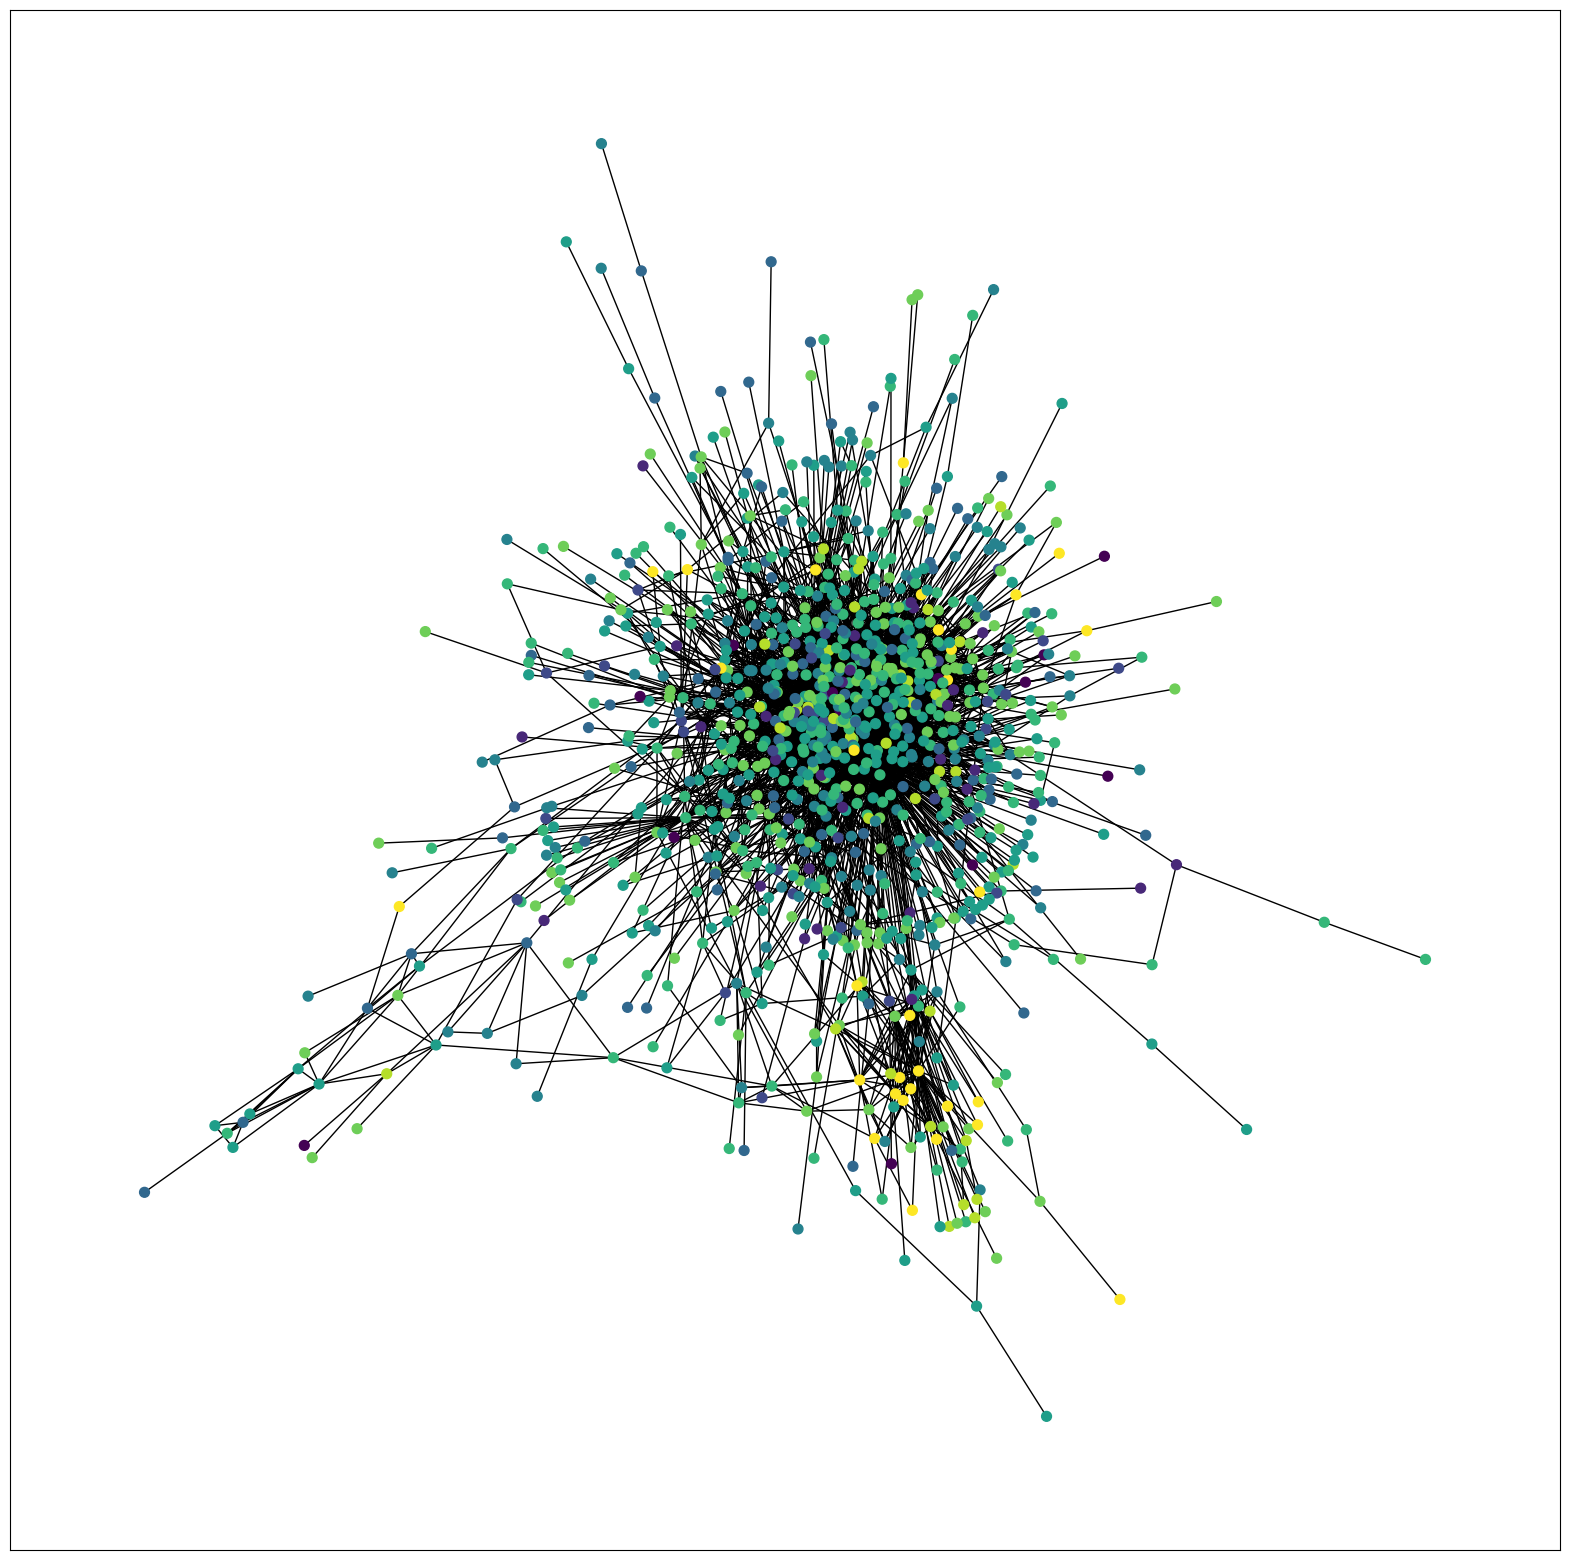

In [46]:
a = s.subgraph(sorted(nx.connected_components(s), key=len, reverse=True)[0])
plt.figure(3,figsize=(20,20))
nx.draw_networkx(a, node_color = [a.nodes[i]['type']/10 for i in a.nodes], with_labels = False, node_size=50)
plt.show()

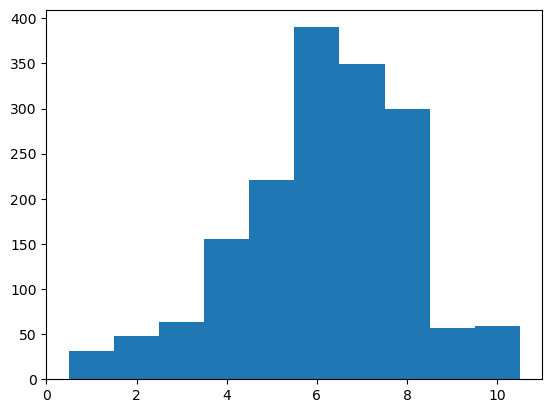

In [48]:
d = np.diff(np.unique(usrs2[:,1])).min()
left_of_first_bin = usrs2[:,1].min() - float(d)/2
right_of_last_bin = usrs2[:,1].max() + float(d)/2
plt.hist(usrs2[:,1], np.arange(left_of_first_bin, right_of_last_bin + d, d))
plt.show()